In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import config
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import json

In [2]:
## URL for the FRED API
base_url = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
general_dict = {
    'ATNHPIUS26420Q': 'Houston House Price Index',
    "CUURA318SA0": "Houston Consumer Price Index",
    "WPUSI012011":"Construction Materials Index",
    "DCOILWTICO": "WTI Oil Price",
    "HOUS448UR":"Unemployment Rate",
    "MORTGAGE30US":"Interest Rate",
    "HTNAGRIDX":"Economic Conditions"
}

'''_________________________________________________________________________________'''
#key values for population 
population_dict = {
    'TXHARR1POP':'Harris Cty Population',
    'TXFORT5POP':'Fort Bend Cty Population',
    'TXMONT0POP':'Montgomery Cty Population ',
    'TXGALV7POP':'Galveston Cty Population',
    'TXBRAZ0POP':'Brazoria Cty Population',
    'TXLIBE1POP':'Liberty Cty Population',
    'TXWALL3POP':'Waller Cty Population',
    'TXCHAM1POP':'Chambers Cty Population ',
    'TXAUST5POP':'Austin Cty Population'
}
'''_________________________________________________________________________________'''
permit_dict = {
    'BPPRIV048201':'Harris Cty Permit',
    'BPPRIV048157':'Fort Bend Cty Permit',
    'TXMONT0POP':'Montgomery Cty Permit ',
    'BPPRIV048167':'Galveston Cty Permit',
    'BPPRIV048039':'Brazoria Cty Permit',
    'BPPRIV048291':'Liberty Cty Permit',
    'BPPRIV048473':'Waller Cty Permit',
    'BPPRIV048071':'Chambers Cty Permit ',
    'BPPRIV048015':'Austin Cty Permit'
}

'''_________________________________________________________________________________'''

#Data Period
start_date = '1991-01-01'
end_date = '2017-01-01'
frequency = 'a'
ftype = '&file_type=json'

s_dates = '&observation_start={}'.format(start_date)
e_dates = '&observation_end={}'.format(end_date)
api_key = '&api_key={}'.format(config.api_key)
freq = '&frequency={}'.format(frequency)

## API Request

In [3]:
'''
+ Sending API request 
+ Original_df contains these variables: 'Houston House Price Index', "Houston Consumer Price Index", 
    "Construction Materials Index",  "WTI Oil Price", "Unemployment Rate", "Interest Rate" 
+ See Data_description text file for details
+ Start date: 01/01/1990 - 01/01/2017
+ Period: Annual
'''
original_df = pd.DataFrame()
for key, name in general_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base_url, key, s_dates,e_dates, api_key, ftype,freq)
    response = requests.get(url).json()['observations']
    original_df[name] = [i['value'] for i in response]
    #original_df.index = pd.to_datetime([i['date'] for i in response])

#Convert datatype into float  
original_df_cols = original_df.columns[original_df.dtypes.eq(object)]
for col_name in original_df_cols:
    original_df[col_name] = pd.to_numeric(original_df[col_name], errors='coerce')
    
original_df.head()

,Houston House Price Index,Houston Consumer Price Index,Construction Materials Index,WTI Oil Price,Unemployment Rate,Interest Rate,Economic Conditions
0,95.88,125.300,120.4,21.54,5.7,9.25,-0.48
1,99.39,129.183,122.5,20.58,7.2,8.39,0.50
2,101.30,133.750,128.6,18.43,7.4,7.31,2.99
3,101.47,137.917,133.9,17.20,6.7,8.38,4.18
4,101.64,139.967,138.8,18.43,5.9,7.93,3.64


## API Request for Population

In [4]:
'''
+ Sending API request for Houston Population 
+ Start date: 01/01/1990 - 01/01/2017
+ Period: Annual
+ The Population_df contains populations for 9 different counties in Houston-Woodlands area
'''
years = []
population_df = pd.DataFrame()
for key, name in population_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base_url, key, s_dates,e_dates, api_key, ftype,freq)
    response = requests.get(url).json()['observations']
    population_df[name] = [i['value'] for i in response]
    #population_df.index = pd.to_datetime([i['date'] for i in response])
    years = pd.to_datetime([i['date'] for i in response])

#convert dataframe values to floats
population_df_cols = population_df.columns[population_df.dtypes.eq(object)]
for col_name in population_df_cols:
    population_df[col_name] = pd.to_numeric(population_df[col_name], errors='coerce')

#sum all population
population_df['Total Population'] = population_df.sum(axis=1)
population_df.head(3)

,Harris Cty Population,Fort Bend Cty Population,Montgomery Cty Population,Galveston Cty Population,Brazoria Cty Population,Liberty Cty Population,Waller Cty Population,Chambers Cty Population,Austin Cty Population,Total Population
0,2912.041,240.604,192.732,222.854,198.707,53.848,23.474,20.442,20.183,3884.885
1,2982.258,253.352,202.374,227.406,203.275,55.051,24.655,20.756,20.643,3989.770
2,3033.757,264.940,211.878,232.199,208.005,56.645,25.718,21.263,21.159,4075.564


## API Request for Permit

In [5]:
'''
+ Sending API request for Houston Population 
+ Start date: 01/01/1990 - 01/01/2017
+ Period: Annual
+ The Population_df contains populations for 9 different counties in Houston-Woodlands area
'''
permit_df = pd.DataFrame()
for key, name in permit_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base_url, key, s_dates,e_dates, api_key, ftype,freq)
    response = requests.get(url).json()['observations']
    permit_df[name] = [i['value'] for i in response]

#convert dataframe values to floats
permit_df_cols = permit_df.columns[permit_df.dtypes.eq(object)]
for col_name in permit_df_cols:
    permit_df[col_name] = pd.to_numeric(permit_df[col_name], errors='coerce')

#sum all population
permit_df['Total Permit'] = permit_df.sum(axis=1)

In [6]:
#Combine population with original Dataframe 
Houston_df = original_df.copy(deep=True)
Houston_df['Houston Population'] = population_df['Total Population']
Houston_df['Total Permit'] = permit_df['Total Permit']

Houston_df.to_csv('../Data/Houston_Data.csv')
Houston_df.head()

,Houston House Price Index,Houston Consumer Price Index,Construction Materials Index,WTI Oil Price,Unemployment Rate,Interest Rate,Economic Conditions,Houston Population,Total Permit
0,95.88,125.300,120.4,21.54,5.7,9.25,-0.48,3884.885,15823.732
1,99.39,129.183,122.5,20.58,7.2,8.39,0.50,3989.770,16879.374
2,101.30,133.750,128.6,18.43,7.4,7.31,2.99,4075.564,17619.878
3,101.47,137.917,133.9,17.20,6.7,8.38,4.18,4153.355,19914.428
4,101.64,139.967,138.8,18.43,5.9,7.93,3.64,4227.574,19143.816


Text(0.5, 1.0, 'Other Key Factors Trend (1991-2018)')

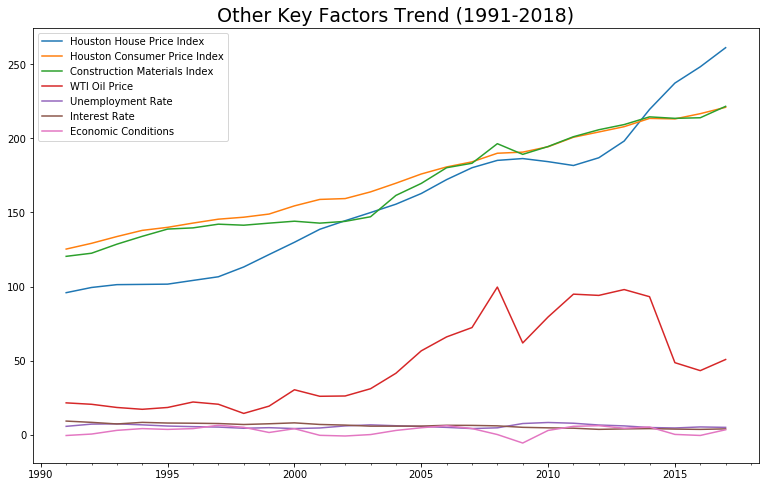

In [7]:
trend_data = original_df.copy(deep=True)
trend_data.index = years
trend_data.plot(figsize =(13,8))
plt.title("Other Key Factors Trend (1991-2018)", size = 19)

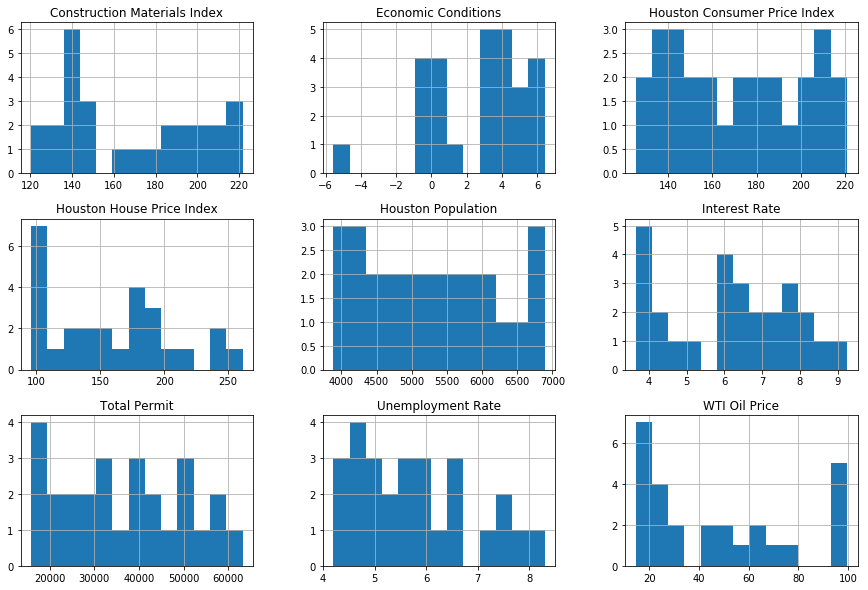

In [8]:
#Plot Histogram for all Variables 
Houston_df.hist(bins = 13 ,figsize =(15,10))
plt.savefig("../Output_Fig/raw_data_Histogram.png")

## Data Transfromation by Difference

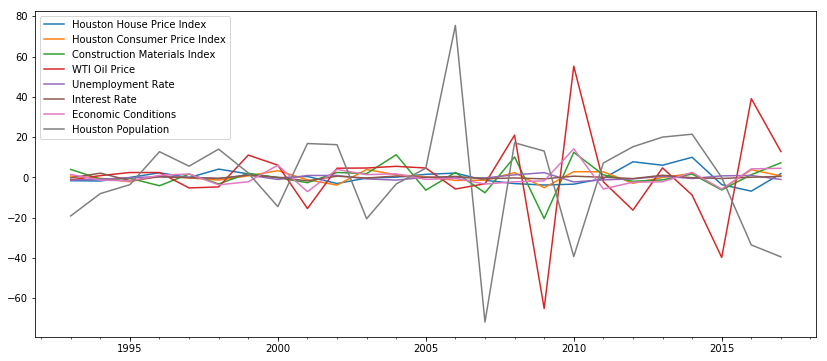

In [9]:
#Taking the first differences 
transformed_df = Houston_df.copy(deep=True)
transformed_df.index = years
transformed_df = transformed_df.diff()
transformed_df = transformed_df.diff()
transformed_df = transformed_df.dropna()
del transformed_df['Total Permit']
transformed_df.plot(figsize = (14,6))
plt.savefig("../Output_Fig/transformed_by_difference.png")

## Transform Data: With Log and Difference

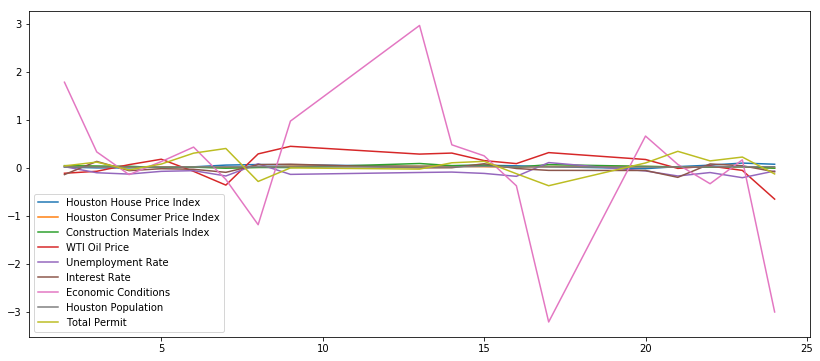

In [10]:
log_data = Houston_df.copy(deep=True)
#log_data.index = years
log_data = log_data.apply(np.log)
log_data = log_data.diff()
log_data = log_data.dropna()
log_data.plot(figsize = (14,6))
log_data.to_csv('../Data/Transformed_Data.csv')
plt.savefig("../Output_Fig/Transformed_Data.png")
plt.savefig("../Output_Fig/transformed_by_log_difference.png")
#log_data.describe()

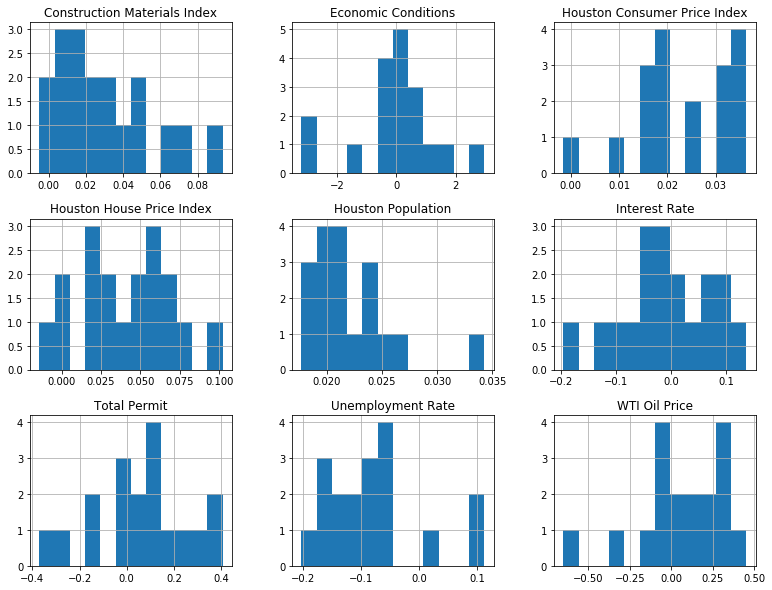

In [25]:
log_data.hist(bins = 12,figsize =(13,10))
plt.savefig("../Output_Fig/transformed_hist.png")

In [12]:
log_data.columns.values

array(['Houston House Price Index', 'Houston Consumer Price Index',
       'Construction Materials Index', 'WTI Oil Price',
       'Unemployment Rate', 'Interest Rate', 'Economic Conditions',
       'Houston Population', 'Total Permit'], dtype=object)

## Perform Regression

In [13]:
import statsmodels.formula.api as sm
reg_data = pd.DataFrame({
    "HPI": log_data['Houston House Price Index'],
    "HCPI": log_data['Houston Consumer Price Index'], 
    "Construction_Cost": log_data['Construction Materials Index'],
    "Oil_Price":log_data['WTI Oil Price'], 
    "Unemployment":log_data['Unemployment Rate'],
    "Interest":log_data['Interest Rate'],
    "Population":log_data['Houston Population'],
    "Economic_Conditions":log_data['Economic Conditions'],
    "Total_Permit":log_data['Total Permit']
    
})
reg_data = reg_data.reset_index(drop=True)
 
fit_result = sm.ols(formula= "HPI ~ HCPI + Construction_Cost + Oil_Price + Unemployment + Interest + Population + Economic_Conditions + Total_Permit", 
                data=reg_data).fit()

print (fit_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1.811
Date:                Sat, 19 Jan 2019   Prob (F-statistic):              0.197
Time:                        13:29:17   Log-Likelihood:                 46.806
No. Observations:                  18   AIC:                            -75.61
Df Residuals:                       9   BIC:                            -67.60
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0806    

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [14]:
fit_result2 = sm.ols(formula="HPI ~ Oil_Price ", 
                data=reg_data).fit()

print (fit_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.4907
Date:                Sat, 19 Jan 2019   Prob (F-statistic):              0.494
Time:                        13:29:17   Log-Likelihood:                 38.444
No. Observations:                  18   AIC:                            -72.89
Df Residuals:                      16   BIC:                            -71.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0418      0.007      5.697      0.0

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
